#  Hormone receptors status in breast cancer

## Data Exploration

In [3]:
import pandas as pd 
import numpy as np 
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_excel("C:\\Users\\Paola\\Desktop\\TEXT MINING\Dataset.xlsx")

In [5]:
data.head(5)

,cod paz,id,numero caso,data referto,reparto,diagnosi,pezzo operatorio,topografia,summary,gross,er,pgr,her2,ki67,fish,modificato
0,74,2011055893,S2011-006911,12-09-2011,Degenze OCB Senologia,-NON EVIDENZA DI METASTASI A DUE LINFONODI ESA...,linf. sentinella ascella D,T-1963,NaN,Tessuto fibroadiposo da cui si isolano 2 linfo...,NaN,NaN,NaN,NaN,NaN,NaN
1,74,2011055891,S2011-006911,12-09-2011,Degenze OCB Senologia,CARCINOMA DELLA MAMMELLA DUTTALE IN SITU con a...,quadr. sup. mammella dx,T-1749,npl. mammella dx,Parenchima mammario di cm 5 x 4 x 4 con al tag...,"[66,100]","[33,66)",3+,NaN,NaN,NaN
2,74,2011055892,S2011-006911,12-09-2011,Degenze OCB Senologia,-PARENCHIMA MAMMARIO RIFERIBILE A REGIONE AREO...,dotti capezzolo D,T-1740,NaN,Frammento di cm 1.,NaN,NaN,NaN,NaN,NaN,NaN
3,74,2011055894,S2011-006911,12-09-2011,Degenze OCB Senologia,-PARENCHIMA MAMMARIO CON FOCOLAI MULTIFOCALI D...,quadrante equatoriale interno mammella S,T-1749,NaN,Parenchima mammario di cm 3x2x1. Al taglio par...,NaN,NaN,NaN,NaN,NaN,NaN
4,74,2011055895,S2011-006911,12-09-2011,Degenze OCB Senologia,--PARENCHIMA MAMMARIO CON FOCOLAI MULTIFOCALI ...,mammella D,T-1749,NaN,"Mammella di cm 20x12 x3 priva di cute, con are...",NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.shape

(74871, 16)

In [7]:
#There are a lot of null value in er/pgr - from 75k to 15k
data.isnull().sum()

cod paz                 0
id                      0
numero caso             0
data referto            0
reparto                37
diagnosi              509
pezzo operatorio     1998
topografia           6676
summary             47251
gross               11580
er                  59966
pgr                 59985
her2                59980
ki67                60471
fish                72279
modificato          73064
dtype: int64

In [8]:
data['er'] = data['er'].astype(str)

In [9]:
#let's see which are the possible values in er and pgr
data['er'].unique()

array(['nan', '[66,100]', '[0,1)', '95', '[33,66)', '[10,33)', 'negativo',
       '[95,100]', '0', '90', '[1,10)', '40', '15', '100', '5', '70', '1',
       '2', '85', '45', '50', '(90,100]', '80', '(95,100]', '30', '+',
       '97', '20', '10', '75', '60', '[0,5)', '98', '99', '<95', '25',
       '92', '7', '4', '55', '8', '[0,95)', '3', '23', '65', '35', '14',
       '[80,100]', '22', '-', '[0,10)', '82', '9', '[10,15)', '6', '>)5'],
      dtype=object)

In [10]:
np.unique(data.er)

array(['(90,100]', '(95,100]', '+', '-', '0', '1', '10', '100', '14',
       '15', '2', '20', '22', '23', '25', '3', '30', '35', '4', '40',
       '45', '5', '50', '55', '6', '60', '65', '7', '70', '75', '8', '80',
       '82', '85', '9', '90', '92', '95', '97', '98', '99', '<95', '>)5',
       '[0,1)', '[0,10)', '[0,5)', '[0,95)', '[1,10)', '[10,15)',
       '[10,33)', '[33,66)', '[66,100]', '[80,100]', '[95,100]', 'nan',
       'negativo'], dtype=object)

In [11]:
data['pgr'] = data['pgr'].astype(str)

In [12]:
np.unique(data.pgr)

array(['(1,100]', '(10,100]', '(80,100]', '(9,100]', '(90,100]', '+', '-',
       '0', '1', '10', '100', '12', '14', '15', '16', '18', '19', '2',
       '20', '22', '25', '26', '28', '3', '30', '35', '4', '40', '43',
       '45', '46', '47', '5', '5-10', '50', '55', '6', '60', '65', '66',
       '7', '70', '73', '75', '79', '8', '80', '85', '9', '90', '92',
       '93', '94', '95', '98', '99', '[0,1)', '[0,10)', '[0,2)', '[0,30)',
       '[0,5)', '[1,10)', '[1,2)', '[10,33)', '[33,66)', '[5,10]',
       '[66,100]', '[70,100]', '[95,100]', 'nan', 'negativo'],
      dtype=object)

In [13]:
data['her2'] = data['her2'].astype(str)

In [14]:
np.unique(data.her2)

array(['0', '1+', '2+', '3+', 'nan', 'negativo', 'positivo'], dtype=object)

In [15]:
data['ki67'] = data['ki67'].astype(str)

In [16]:
np.unique(data.ki67)

array(['(10,100]', '(30,100]', '(40,100]', '(43,100]', '(50,100]',
       '(60,100]', '(68,100]', '(80,100]', '(90,100]', '0', '1', '1,7',
       '10', "10'", '100', '11', '12', '12,8', '13', '14', '15', '15,3',
       '15,4', '15,8', '15-20', '16', '16,6', '17', '17,5', '18', '18,5',
       '19', '2', '20', '20,4', '21', '22', '22,2', '22,3', '22,7', '23',
       '24', '24,2', '24,3', '25', '26', '27', '27,5', '28', '28,5', '29',
       '3', '30', '31', '31,5', '32', '32,7', '33', '34', '34,5', '35',
       '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55',
       '56', '57', '58', '6', '60', '61', '62', '63', '64', '65', '67',
       '68', '69', '7', '70', '71', '72', '73', '75', '76', '77', '78',
       '8', '80', '81', '82', '83', '85', '86', '87', '88', '9', '9,5',
       '90', '92', '95', '97', '98', '????', '[0,10)', '[0,12)', '[0,2)',
       '[0,5)', '[0,55)', '[1,2)', '[10,15)', '[10,30)', '[

In [17]:
data['fish'] = data['fish'].astype(str)

In [18]:
np.unique(data.fish)

array(['amplificato', 'nan', 'non amplificato'], dtype=object)

<AxesSubplot:>

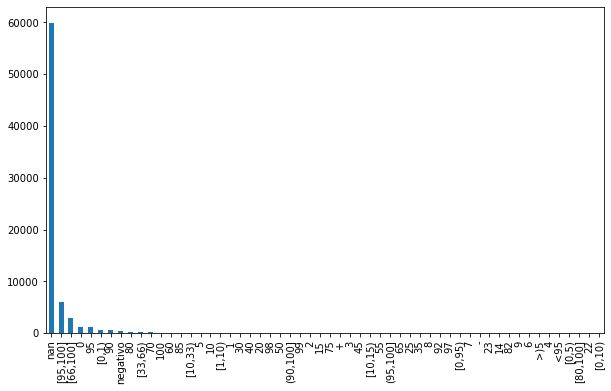

In [19]:
#let's see the distribution of our values  - er unbalanced
data.er.value_counts().plot(kind="bar", figsize = (10,6))

<AxesSubplot:>

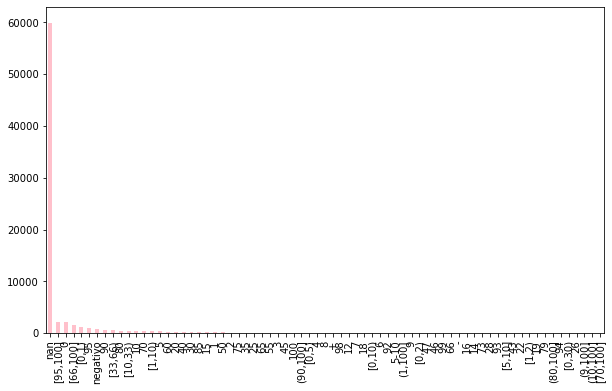

In [20]:
#pgr unbalanced
data.pgr.value_counts().plot(kind="bar", figsize = (10,6), color = "pink")

In [21]:
#exclude Nan Values from estrogen and progestogen
data = data[data["er"] != "nan"]
data = data[data["pgr"] != "nan"]

<AxesSubplot:>

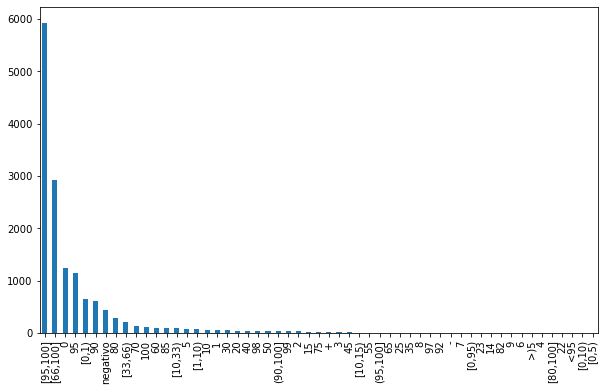

In [22]:
#re-plot data
data.er.value_counts().plot(kind="bar", figsize = (10,6))

<AxesSubplot:>

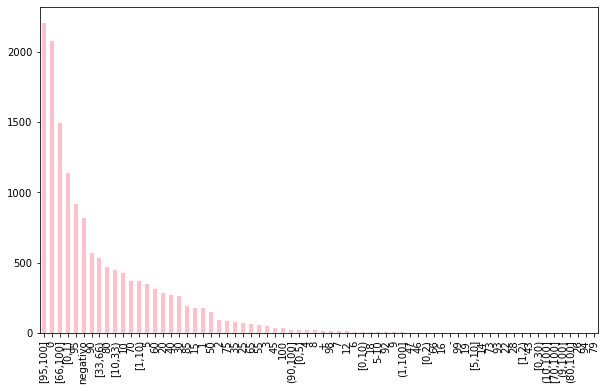

In [23]:
#p
data.pgr.value_counts().plot(kind="bar", figsize = (10,6), color = "pink")

In [24]:
data.head(10)

,cod paz,id,numero caso,data referto,reparto,diagnosi,pezzo operatorio,topografia,summary,gross,er,pgr,her2,ki67,fish,modificato
1,74,2011055891,S2011-006911,12-09-2011,Degenze OCB Senologia,CARCINOMA DELLA MAMMELLA DUTTALE IN SITU con a...,quadr. sup. mammella dx,T-1749,npl. mammella dx,Parenchima mammario di cm 5 x 4 x 4 con al tag...,"[66,100]","[33,66)",3+,nan,nan,NaN
11,74,2011055891,S2011-006911,12-09-2011,Degenze OCB Senologia,CARCINOMA DELLA MAMMELLA DUTTALE IN SITU con a...,quadr. sup. mammella dx,T-1749,npl. mammella dx,Parenchima mammario di cm 5 x 4 x 4 con al tag...,"[66,100]","[33,66)",3+,nan,nan,NaN
20,299,2012013996,C2012-000276,14-11-2011,Esterni,CARCINOMA INVASIVO DELLA MAMMELLASottotipo: DU...,11- I- 19036 ; mammella sx,T-1749,carcinoma duttale infiltrante,"N del caso: 11 -I -19036 ( 1,2,3,4,5 )Ospedal...","[66,100]","[10,33)",1+,15,nan,NaN
28,299,2012013996,C2012-000276,14-11-2011,Esterni,CARCINOMA INVASIVO DELLA MAMMELLASottotipo: DU...,11- I- 19036 ; mammella sx,T-1749,carcinoma duttale infiltrante,"N del caso: 11 -I -19036 ( 1,2,3,4,5 )Ospedal...","[66,100]","[10,33)",1+,15,nan,NaN
39,102,2011008477,B2011-005462,31-08-2011,AMB RDC Radiologia C RADIOLOGIA SENOLOGICA,Risultato degli esami immunoistochimici effett...,NaN,NaN,NaN,NaN,"[0,1)","[1,10)",0,"(30,100]",nan,NaN
45,102,2011058933,S2011-008023,19-10-2011,Degenze OCB Senologia,CARCINOMA INVASIVO DELLA MAMMELLAGrado istolog...,mammella S,T-1749,NaN,Mammella S di cm 18x8x4 con losanga di cute di...,"[0,1)","[0,1)",2+,"(30,100]",nan,1.0
48,12,2011057243,S2011-007434,29-09-2011,Degenze OCB Senologia,CARCINOMA INVASIVO DELLA MAMMELLASottotipo: DU...,nodulo QE mamm. D,T-1749,npl mammella D,Parenchima mammario di cm 6x4x3 con un nodulo ...,"[66,100]","[1,10)",1+,35,nan,NaN
50,13,2011057297,S2011-007446,29-09-2011,Degenze OCB Senologia,CARCINOMA INVASIVO DELLA MAMMELLASottotipo: DU...,Mammella S.,T-1749,NaN,Mammella priva di cute e capezzolo di cm 20x20...,"[66,100]","[66,100]",2+,30,nan,NaN
55,93,2011059162,S2011-008103,21-10-2011,Degenze OCB Senologia,"1,3) CARCINOMA INVASIVO DELLA MAMMELLASottotip...",nodulo infra-areolare mammella S,T-1749,npl mammella S C4,Parenchima mammario di cm 4 di asse maggiore c...,95,95,0,26,nan,1.0
63,93,2011059162,S2011-008103,21-10-2011,Degenze OCB Senologia,"1,3) CARCINOMA INVASIVO DELLA MAMMELLASottotip...",nodulo infra-areolare mammella S,T-1749,npl mammella S C4,Parenchima mammario di cm 4 di asse maggiore c...,95,95,0,26,nan,1.0


In [25]:
data["text"] = data["diagnosi"] + data["pezzo operatorio"]

In [26]:
data.head(10)

,cod paz,id,numero caso,data referto,reparto,diagnosi,pezzo operatorio,topografia,summary,gross,er,pgr,her2,ki67,fish,modificato,text
1,74,2011055891,S2011-006911,12-09-2011,Degenze OCB Senologia,CARCINOMA DELLA MAMMELLA DUTTALE IN SITU con a...,quadr. sup. mammella dx,T-1749,npl. mammella dx,Parenchima mammario di cm 5 x 4 x 4 con al tag...,"[66,100]","[33,66)",3+,nan,nan,NaN,CARCINOMA DELLA MAMMELLA DUTTALE IN SITU con a...
11,74,2011055891,S2011-006911,12-09-2011,Degenze OCB Senologia,CARCINOMA DELLA MAMMELLA DUTTALE IN SITU con a...,quadr. sup. mammella dx,T-1749,npl. mammella dx,Parenchima mammario di cm 5 x 4 x 4 con al tag...,"[66,100]","[33,66)",3+,nan,nan,NaN,CARCINOMA DELLA MAMMELLA DUTTALE IN SITU con a...
20,299,2012013996,C2012-000276,14-11-2011,Esterni,CARCINOMA INVASIVO DELLA MAMMELLASottotipo: DU...,11- I- 19036 ; mammella sx,T-1749,carcinoma duttale infiltrante,"N del caso: 11 -I -19036 ( 1,2,3,4,5 )Ospedal...","[66,100]","[10,33)",1+,15,nan,NaN,CARCINOMA INVASIVO DELLA MAMMELLASottotipo: DU...
28,299,2012013996,C2012-000276,14-11-2011,Esterni,CARCINOMA INVASIVO DELLA MAMMELLASottotipo: DU...,11- I- 19036 ; mammella sx,T-1749,carcinoma duttale infiltrante,"N del caso: 11 -I -19036 ( 1,2,3,4,5 )Ospedal...","[66,100]","[10,33)",1+,15,nan,NaN,CARCINOMA INVASIVO DELLA MAMMELLASottotipo: DU...
39,102,2011008477,B2011-005462,31-08-2011,AMB RDC Radiologia C RADIOLOGIA SENOLOGICA,Risultato degli esami immunoistochimici effett...,NaN,NaN,NaN,NaN,"[0,1)","[1,10)",0,"(30,100]",nan,NaN,NaN
45,102,2011058933,S2011-008023,19-10-2011,Degenze OCB Senologia,CARCINOMA INVASIVO DELLA MAMMELLAGrado istolog...,mammella S,T-1749,NaN,Mammella S di cm 18x8x4 con losanga di cute di...,"[0,1)","[0,1)",2+,"(30,100]",nan,1.0,CARCINOMA INVASIVO DELLA MAMMELLAGrado istolog...
48,12,2011057243,S2011-007434,29-09-2011,Degenze OCB Senologia,CARCINOMA INVASIVO DELLA MAMMELLASottotipo: DU...,nodulo QE mamm. D,T-1749,npl mammella D,Parenchima mammario di cm 6x4x3 con un nodulo ...,"[66,100]","[1,10)",1+,35,nan,NaN,CARCINOMA INVASIVO DELLA MAMMELLASottotipo: DU...
50,13,2011057297,S2011-007446,29-09-2011,Degenze OCB Senologia,CARCINOMA INVASIVO DELLA MAMMELLASottotipo: DU...,Mammella S.,T-1749,NaN,Mammella priva di cute e capezzolo di cm 20x20...,"[66,100]","[66,100]",2+,30,nan,NaN,CARCINOMA INVASIVO DELLA MAMMELLASottotipo: DU...
55,93,2011059162,S2011-008103,21-10-2011,Degenze OCB Senologia,"1,3) CARCINOMA INVASIVO DELLA MAMMELLASottotip...",nodulo infra-areolare mammella S,T-1749,npl mammella S C4,Parenchima mammario di cm 4 di asse maggiore c...,95,95,0,26,nan,1.0,"1,3) CARCINOMA INVASIVO DELLA MAMMELLASottotip..."
63,93,2011059162,S2011-008103,21-10-2011,Degenze OCB Senologia,"1,3) CARCINOMA INVASIVO DELLA MAMMELLASottotip...",nodulo infra-areolare mammella S,T-1749,npl mammella S C4,Parenchima mammario di cm 4 di asse maggiore c...,95,95,0,26,nan,1.0,"1,3) CARCINOMA INVASIVO DELLA MAMMELLASottotip..."


In [27]:
data.text.values[0]

"CARCINOMA DELLA MAMMELLA DUTTALE IN SITU con aspetti di tipo apocrinoGrado nucleare :IIIGrado istologico (EPWG):III con cancerizzazione lobulare.Necrosi tumorale:PresenteCalcificazioni:PresentiDistribuzione del carcinoma in situ:MultifocaleDimensioni della neoplasia in situ: foci multifocali il maggiore di cm 1,5Focale immagine di permeazione neoplastica vascolare attribuibile a trasporto da manovre bioptiche.Assetto recettoriale, immunoreattivita' di membrana per Her-2/neu e frazione proliferante:ER, Proporzione di cellule positive nella sezione esaminata:>=66% e 100%    PgR, Proporzione di cellule positive nella sezione esaminata:>=33% e <66%     Immunoreattività di membrana per Her-2/neu (anticorpo policlonale Dako):3+ (fortemente positivo)quadr. sup. mammella dx"

In [28]:
data['summary'] = data['summary'].astype(str)

In [29]:
#doing this we exclude nan values in column summary
data[data['summary'].apply(len)>3]

,cod paz,id,numero caso,data referto,reparto,diagnosi,pezzo operatorio,topografia,summary,gross,er,pgr,her2,ki67,fish,modificato,text
1,74,2011055891,S2011-006911,12-09-2011,Degenze OCB Senologia,CARCINOMA DELLA MAMMELLA DUTTALE IN SITU con a...,quadr. sup. mammella dx,T-1749,npl. mammella dx,Parenchima mammario di cm 5 x 4 x 4 con al tag...,"[66,100]","[33,66)",3+,nan,nan,NaN,CARCINOMA DELLA MAMMELLA DUTTALE IN SITU con a...
11,74,2011055891,S2011-006911,12-09-2011,Degenze OCB Senologia,CARCINOMA DELLA MAMMELLA DUTTALE IN SITU con a...,quadr. sup. mammella dx,T-1749,npl. mammella dx,Parenchima mammario di cm 5 x 4 x 4 con al tag...,"[66,100]","[33,66)",3+,nan,nan,NaN,CARCINOMA DELLA MAMMELLA DUTTALE IN SITU con a...
20,299,2012013996,C2012-000276,14-11-2011,Esterni,CARCINOMA INVASIVO DELLA MAMMELLASottotipo: DU...,11- I- 19036 ; mammella sx,T-1749,carcinoma duttale infiltrante,"N del caso: 11 -I -19036 ( 1,2,3,4,5 )Ospedal...","[66,100]","[10,33)",1+,15,nan,NaN,CARCINOMA INVASIVO DELLA MAMMELLASottotipo: DU...
28,299,2012013996,C2012-000276,14-11-2011,Esterni,CARCINOMA INVASIVO DELLA MAMMELLASottotipo: DU...,11- I- 19036 ; mammella sx,T-1749,carcinoma duttale infiltrante,"N del caso: 11 -I -19036 ( 1,2,3,4,5 )Ospedal...","[66,100]","[10,33)",1+,15,nan,NaN,CARCINOMA INVASIVO DELLA MAMMELLASottotipo: DU...
48,12,2011057243,S2011-007434,29-09-2011,Degenze OCB Senologia,CARCINOMA INVASIVO DELLA MAMMELLASottotipo: DU...,nodulo QE mamm. D,T-1749,npl mammella D,Parenchima mammario di cm 6x4x3 con un nodulo ...,"[66,100]","[1,10)",1+,35,nan,NaN,CARCINOMA INVASIVO DELLA MAMMELLASottotipo: DU...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74855,8682,2018005513,B2018-000081,04-01-2018,AMB RDC Radiologia C RADIOLOGIA SENOLOGICA,"Assetto recettoriale, immunoreattivita' di mem...",frammenti da adenopatia ascellare dx diametro ...,T-1749,adenopatia ascellare a dx,In formalina: numero 3 frammenti di dimensio...,"[95,100]",15,2+,35,nan,NaN,"Assetto recettoriale, immunoreattivita' di mem..."
74856,8682,2018010720,B2018-000072,04-01-2018,AMB RDC Radiologia C RADIOLOGIA SENOLOGICA,"Assetto recettoriale, immunoreattivita' di mem...",frammenti da nodulo sospetto diametro 15 mm QI...,T-1749,nodulo solido sospetto,In formalina: numero 2 frammenti di dimensio...,"[95,100]",20,3+,20,nan,NaN,"Assetto recettoriale, immunoreattivita' di mem..."
74861,8682,2018010721,B2018-000077,04-01-2018,AMB RDC Radiologia C RADIOLOGIA SENOLOGICA,"Assetto recettoriale, immunoreattivita' di mem...",frammenti da nodulo sospetto diametro 17 mm a ...,T-1749,nodulo solido sospetto,In formalina: numero 6 frammenti di dimensio...,"[95,100]","[95,100]",1+,8,nan,NaN,"Assetto recettoriale, immunoreattivita' di mem..."
74865,8682,2018005513,B2018-000081,04-01-2018,AMB RDC Radiologia C RADIOLOGIA SENOLOGICA,"Assetto recettoriale, immunoreattivita' di mem...",frammenti da adenopatia ascellare dx diametro ...,T-1749,adenopatia ascellare a dx,In formalina: numero 3 frammenti di dimensio...,"[95,100]",15,2+,35,nan,NaN,"Assetto recettoriale, immunoreattivita' di mem..."


In [30]:
data.shape

(14828, 17)

In [31]:
data['pezzo operatorio'] = data['pezzo operatorio'].astype(str)

In [32]:
data['diagnosi'] = data['diagnosi'].astype(str)

In [33]:
np.unique(data["pezzo operatorio"])

array(['(a) neof. mammaria II  sin, (b) QII sin',
       '1 frustolo  core biopsy',
       '1 frustolo diderma e di neoplasia mammella dx', ...,
       'tumefazione di consistenza molto dura',
       'tumefazione di diametro 5 cm mammella D',
       'tumefazione retro areolare diam. 5 cm mammella dx'], dtype=object)

In [34]:
#at the end our column text it will be a concatenation of diagnosi, pezzo operatorio and summary

data["text"] = data["diagnosi"] + data["pezzo operatorio"]+ data["summary"]

In [35]:
#example of our new column
data.text.values[23]

'Risultato degli esami immunoistochimici effettuati:ER-ICA Proporzione di cellule positive nella sezione esaminata:>=66% e 100%  PgR-ICA Proporzione di cellule positive nella sezione esaminata:>=33% e <66%  p185(Her 2 neu):2+ (debolmente positivo)nannan'

In [36]:
#checking that there is no nan values in text, evene if some components are nan
data.head(10)

,cod paz,id,numero caso,data referto,reparto,diagnosi,pezzo operatorio,topografia,summary,gross,er,pgr,her2,ki67,fish,modificato,text
1,74,2011055891,S2011-006911,12-09-2011,Degenze OCB Senologia,CARCINOMA DELLA MAMMELLA DUTTALE IN SITU con a...,quadr. sup. mammella dx,T-1749,npl. mammella dx,Parenchima mammario di cm 5 x 4 x 4 con al tag...,"[66,100]","[33,66)",3+,nan,nan,NaN,CARCINOMA DELLA MAMMELLA DUTTALE IN SITU con a...
11,74,2011055891,S2011-006911,12-09-2011,Degenze OCB Senologia,CARCINOMA DELLA MAMMELLA DUTTALE IN SITU con a...,quadr. sup. mammella dx,T-1749,npl. mammella dx,Parenchima mammario di cm 5 x 4 x 4 con al tag...,"[66,100]","[33,66)",3+,nan,nan,NaN,CARCINOMA DELLA MAMMELLA DUTTALE IN SITU con a...
20,299,2012013996,C2012-000276,14-11-2011,Esterni,CARCINOMA INVASIVO DELLA MAMMELLASottotipo: DU...,11- I- 19036 ; mammella sx,T-1749,carcinoma duttale infiltrante,"N del caso: 11 -I -19036 ( 1,2,3,4,5 )Ospedal...","[66,100]","[10,33)",1+,15,nan,NaN,CARCINOMA INVASIVO DELLA MAMMELLASottotipo: DU...
28,299,2012013996,C2012-000276,14-11-2011,Esterni,CARCINOMA INVASIVO DELLA MAMMELLASottotipo: DU...,11- I- 19036 ; mammella sx,T-1749,carcinoma duttale infiltrante,"N del caso: 11 -I -19036 ( 1,2,3,4,5 )Ospedal...","[66,100]","[10,33)",1+,15,nan,NaN,CARCINOMA INVASIVO DELLA MAMMELLASottotipo: DU...
39,102,2011008477,B2011-005462,31-08-2011,AMB RDC Radiologia C RADIOLOGIA SENOLOGICA,Risultato degli esami immunoistochimici effett...,nan,NaN,nan,NaN,"[0,1)","[1,10)",0,"(30,100]",nan,NaN,Risultato degli esami immunoistochimici effett...
45,102,2011058933,S2011-008023,19-10-2011,Degenze OCB Senologia,CARCINOMA INVASIVO DELLA MAMMELLAGrado istolog...,mammella S,T-1749,nan,Mammella S di cm 18x8x4 con losanga di cute di...,"[0,1)","[0,1)",2+,"(30,100]",nan,1.0,CARCINOMA INVASIVO DELLA MAMMELLAGrado istolog...
48,12,2011057243,S2011-007434,29-09-2011,Degenze OCB Senologia,CARCINOMA INVASIVO DELLA MAMMELLASottotipo: DU...,nodulo QE mamm. D,T-1749,npl mammella D,Parenchima mammario di cm 6x4x3 con un nodulo ...,"[66,100]","[1,10)",1+,35,nan,NaN,CARCINOMA INVASIVO DELLA MAMMELLASottotipo: DU...
50,13,2011057297,S2011-007446,29-09-2011,Degenze OCB Senologia,CARCINOMA INVASIVO DELLA MAMMELLASottotipo: DU...,Mammella S.,T-1749,nan,Mammella priva di cute e capezzolo di cm 20x20...,"[66,100]","[66,100]",2+,30,nan,NaN,CARCINOMA INVASIVO DELLA MAMMELLASottotipo: DU...
55,93,2011059162,S2011-008103,21-10-2011,Degenze OCB Senologia,"1,3) CARCINOMA INVASIVO DELLA MAMMELLASottotip...",nodulo infra-areolare mammella S,T-1749,npl mammella S C4,Parenchima mammario di cm 4 di asse maggiore c...,95,95,0,26,nan,1.0,"1,3) CARCINOMA INVASIVO DELLA MAMMELLASottotip..."
63,93,2011059162,S2011-008103,21-10-2011,Degenze OCB Senologia,"1,3) CARCINOMA INVASIVO DELLA MAMMELLASottotip...",nodulo infra-areolare mammella S,T-1749,npl mammella S C4,Parenchima mammario di cm 4 di asse maggiore c...,95,95,0,26,nan,1.0,"1,3) CARCINOMA INVASIVO DELLA MAMMELLASottotip..."


In [37]:
data.isnull().sum()

cod paz                 0
id                      0
numero caso             0
data referto            0
reparto                 6
diagnosi                0
pezzo operatorio        0
topografia           2598
summary                 0
gross                1337
er                      0
pgr                     0
her2                    0
ki67                    0
fish                    0
modificato          13286
text                    0
dtype: int64

## Data preparation

In [58]:
#!pip install neattext
import neattext.functions as nfx 
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize.treebank import TreebankWordDetokenizer

In [39]:
def lower_case(text): 
  return text.lower()

stop = stopwords.words('italian')

In [40]:

data["text_cleaned"] = data["text"].apply(nfx.remove_special_characters)
#data["text_cleaned"] = data["text_cleaned"].apply(nfx.remove_bad_quotes)
data["text_cleaned"] = data["text_cleaned"].apply(nfx.remove_punctuations)
data["text_cleaned"] = data["text_cleaned"].apply(nfx.remove_numbers)
data["text_cleaned"] = data["text_cleaned"].apply(nfx.remove_multiple_spaces)
data["text_cleaned"] = data["text_cleaned"].apply(lower_case)
data["text_cleaned"]= data["text_cleaned"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [41]:
#from nltk.corpus import stopwords
#stop = stopwords.words('italian')
#data["text_cleaned"]= data["text_cleaned"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [42]:
#check column text vs text_Cleaned to see the differences
data.text_cleaned.values[1]

'carcinoma mammella duttale situ aspetti tipo apocrinogrado nucleare iiigrado istologico epwgiii cancerizzazione lobularenecrosi tumoralepresentecalcificazionipresentidistribuzione carcinoma situmultifocaledimensioni neoplasia situ foci multifocali maggiore cm focale immagine permeazione neoplastica vascolare attribuibile trasporto manovre biopticheassetto recettoriale immunoreattivita membrana herneu frazione proliferanteer proporzione cellule positive sezione esaminata pgr proporzione cellule positive sezione esaminata immunoreattivit membrana herneu anticorpo policlonale dako fortemente positivoquadr sup mammella dxnpl mammella dx'

In [43]:
data.text.values[1]

"CARCINOMA DELLA MAMMELLA DUTTALE IN SITU con aspetti di tipo apocrinoGrado nucleare :IIIGrado istologico (EPWG):III con cancerizzazione lobulare.Necrosi tumorale:PresenteCalcificazioni:PresentiDistribuzione del carcinoma in situ:MultifocaleDimensioni della neoplasia in situ: foci multifocali il maggiore di cm 1,5Focale immagine di permeazione neoplastica vascolare attribuibile a trasporto da manovre bioptiche.Assetto recettoriale, immunoreattivita' di membrana per Her-2/neu e frazione proliferante:ER, Proporzione di cellule positive nella sezione esaminata:>=66% e 100%    PgR, Proporzione di cellule positive nella sezione esaminata:>=33% e <66%     Immunoreattività di membrana per Her-2/neu (anticorpo policlonale Dako):3+ (fortemente positivo)quadr. sup. mammella dxnpl. mammella dx"

In [44]:
np.unique(data["er"])
#make sense to predict some intervals eg neg, 0-5,5-10 and so on

array(['(90,100]', '(95,100]', '+', '-', '0', '1', '10', '100', '14',
       '15', '2', '20', '22', '23', '25', '3', '30', '35', '4', '40',
       '45', '5', '50', '55', '6', '60', '65', '7', '70', '75', '8', '80',
       '82', '85', '9', '90', '92', '95', '97', '98', '99', '<95', '>)5',
       '[0,1)', '[0,10)', '[0,5)', '[0,95)', '[1,10)', '[10,15)',
       '[10,33)', '[33,66)', '[66,100]', '[80,100]', '[95,100]',
       'negativo'], dtype=object)

In [45]:
tokenizer = RegexpTokenizer(
    "(?:(?<=\s)|(?<=^)|(?<=[>\"]))[a-z-']+(?:(?=\s)|(?=\:\s)|(?=$)|(?=[.!,;\"]))"
)

In [46]:
data["text_tokenize"] = data.text_cleaned.apply(tokenizer.tokenize)

In [47]:
data.head()

,cod paz,id,numero caso,data referto,reparto,diagnosi,pezzo operatorio,topografia,summary,gross,er,pgr,her2,ki67,fish,modificato,text,text_cleaned,text_tokenize
1,74,2011055891,S2011-006911,12-09-2011,Degenze OCB Senologia,CARCINOMA DELLA MAMMELLA DUTTALE IN SITU con a...,quadr. sup. mammella dx,T-1749,npl. mammella dx,Parenchima mammario di cm 5 x 4 x 4 con al tag...,"[66,100]","[33,66)",3+,nan,nan,NaN,CARCINOMA DELLA MAMMELLA DUTTALE IN SITU con a...,carcinoma mammella duttale situ aspetti tipo a...,"[carcinoma, mammella, duttale, situ, aspetti, ..."
11,74,2011055891,S2011-006911,12-09-2011,Degenze OCB Senologia,CARCINOMA DELLA MAMMELLA DUTTALE IN SITU con a...,quadr. sup. mammella dx,T-1749,npl. mammella dx,Parenchima mammario di cm 5 x 4 x 4 con al tag...,"[66,100]","[33,66)",3+,nan,nan,NaN,CARCINOMA DELLA MAMMELLA DUTTALE IN SITU con a...,carcinoma mammella duttale situ aspetti tipo a...,"[carcinoma, mammella, duttale, situ, aspetti, ..."
20,299,2012013996,C2012-000276,14-11-2011,Esterni,CARCINOMA INVASIVO DELLA MAMMELLASottotipo: DU...,11- I- 19036 ; mammella sx,T-1749,carcinoma duttale infiltrante,"N del caso: 11 -I -19036 ( 1,2,3,4,5 )Ospedal...","[66,100]","[10,33)",1+,15,nan,NaN,CARCINOMA INVASIVO DELLA MAMMELLASottotipo: DU...,carcinoma invasivo mammellasottotipo duttale n...,"[carcinoma, invasivo, mammellasottotipo, dutta..."
28,299,2012013996,C2012-000276,14-11-2011,Esterni,CARCINOMA INVASIVO DELLA MAMMELLASottotipo: DU...,11- I- 19036 ; mammella sx,T-1749,carcinoma duttale infiltrante,"N del caso: 11 -I -19036 ( 1,2,3,4,5 )Ospedal...","[66,100]","[10,33)",1+,15,nan,NaN,CARCINOMA INVASIVO DELLA MAMMELLASottotipo: DU...,carcinoma invasivo mammellasottotipo duttale n...,"[carcinoma, invasivo, mammellasottotipo, dutta..."
39,102,2011008477,B2011-005462,31-08-2011,AMB RDC Radiologia C RADIOLOGIA SENOLOGICA,Risultato degli esami immunoistochimici effett...,nan,NaN,nan,NaN,"[0,1)","[1,10)",0,"(30,100]",nan,NaN,Risultato degli esami immunoistochimici effett...,risultato esami immunoistochimici effettuatier...,"[risultato, esami, immunoistochimici, effettua..."


In [48]:
data.text_cleaned.values[0]

'carcinoma mammella duttale situ aspetti tipo apocrinogrado nucleare iiigrado istologico epwgiii cancerizzazione lobularenecrosi tumoralepresentecalcificazionipresentidistribuzione carcinoma situmultifocaledimensioni neoplasia situ foci multifocali maggiore cm focale immagine permeazione neoplastica vascolare attribuibile trasporto manovre biopticheassetto recettoriale immunoreattivita membrana herneu frazione proliferanteer proporzione cellule positive sezione esaminata pgr proporzione cellule positive sezione esaminata immunoreattivit membrana herneu anticorpo policlonale dako fortemente positivoquadr sup mammella dxnpl mammella dx'

In [49]:
data.text_tokenize.values[0]

['carcinoma',
 'mammella',
 'duttale',
 'situ',
 'aspetti',
 'tipo',
 'apocrinogrado',
 'nucleare',
 'iiigrado',
 'istologico',
 'epwgiii',
 'cancerizzazione',
 'lobularenecrosi',
 'tumoralepresentecalcificazionipresentidistribuzione',
 'carcinoma',
 'situmultifocaledimensioni',
 'neoplasia',
 'situ',
 'foci',
 'multifocali',
 'maggiore',
 'cm',
 'focale',
 'immagine',
 'permeazione',
 'neoplastica',
 'vascolare',
 'attribuibile',
 'trasporto',
 'manovre',
 'biopticheassetto',
 'recettoriale',
 'immunoreattivita',
 'membrana',
 'herneu',
 'frazione',
 'proliferanteer',
 'proporzione',
 'cellule',
 'positive',
 'sezione',
 'esaminata',
 'pgr',
 'proporzione',
 'cellule',
 'positive',
 'sezione',
 'esaminata',
 'immunoreattivit',
 'membrana',
 'herneu',
 'anticorpo',
 'policlonale',
 'dako',
 'fortemente',
 'positivoquadr',
 'sup',
 'mammella',
 'dxnpl',
 'mammella',
 'dx']

In [50]:
def stemming(text):
  stemming = SnowballStemmer(language='italian')
  return[stemming.stem(word) for word in text]

In [51]:
data["text_stemming"] = data["text_tokenize"].apply(stemming)

In [52]:
data.tail()

,cod paz,id,numero caso,data referto,reparto,diagnosi,pezzo operatorio,topografia,summary,gross,er,pgr,her2,ki67,fish,modificato,text,text_cleaned,text_tokenize,text_stemming
74859,8682,2018110062,S2018-007188,03-10-2018,Degenze OCB Senologia,"Assetto recettoriale, immunoreattivita' di mem...",nan,NaN,nan,NaN,90,0,1+,3,nan,NaN,"Assetto recettoriale, immunoreattivita' di mem...",assetto recettoriale immunoreattivita membrana...,"[assetto, recettoriale, immunoreattivita, memb...","[assett, recettorial, immunoreattiv, membran, ..."
74861,8682,2018010721,B2018-000077,04-01-2018,AMB RDC Radiologia C RADIOLOGIA SENOLOGICA,"Assetto recettoriale, immunoreattivita' di mem...",frammenti da nodulo sospetto diametro 17 mm a ...,T-1749,nodulo solido sospetto,In formalina: numero 6 frammenti di dimensio...,"[95,100]","[95,100]",1+,8,nan,NaN,"Assetto recettoriale, immunoreattivita' di mem...",assetto recettoriale immunoreattivita membrana...,"[assetto, recettoriale, immunoreattivita, memb...","[assett, recettorial, immunoreattiv, membran, ..."
74865,8682,2018005513,B2018-000081,04-01-2018,AMB RDC Radiologia C RADIOLOGIA SENOLOGICA,"Assetto recettoriale, immunoreattivita' di mem...",frammenti da adenopatia ascellare dx diametro ...,T-1749,adenopatia ascellare a dx,In formalina: numero 3 frammenti di dimensio...,"[95,100]",15,2+,35,nan,NaN,"Assetto recettoriale, immunoreattivita' di mem...",assetto recettoriale immunoreattivita membrana...,"[assetto, recettoriale, immunoreattivita, memb...","[assett, recettorial, immunoreattiv, membran, ..."
74866,8682,2018010720,B2018-000072,04-01-2018,AMB RDC Radiologia C RADIOLOGIA SENOLOGICA,"Assetto recettoriale, immunoreattivita' di mem...",frammenti da nodulo sospetto diametro 15 mm QI...,T-1749,nodulo solido sospetto,In formalina: numero 2 frammenti di dimensio...,"[95,100]",20,3+,20,nan,NaN,"Assetto recettoriale, immunoreattivita' di mem...",assetto recettoriale immunoreattivita membrana...,"[assetto, recettoriale, immunoreattivita, memb...","[assett, recettorial, immunoreattiv, membran, ..."
74869,8682,2018110062,S2018-007188,03-10-2018,Degenze OCB Senologia,"Assetto recettoriale, immunoreattivita' di mem...",nan,NaN,nan,NaN,90,0,1+,3,nan,NaN,"Assetto recettoriale, immunoreattivita' di mem...",assetto recettoriale immunoreattivita membrana...,"[assetto, recettoriale, immunoreattivita, memb...","[assett, recettorial, immunoreattiv, membran, ..."


In [53]:
data.shape

(14828, 20)

In [55]:
data.text_stemming.values[0]

['carcinom',
 'mammell',
 'duttal',
 'situ',
 'aspett',
 'tip',
 'apocrinograd',
 'nucl',
 'iiigrad',
 'istolog',
 'epwgii',
 'cancerizz',
 'lobularenecr',
 'tumoralepresentecalcificazionipresentidistribu',
 'carcinom',
 'situmultifocaledimension',
 'neoplas',
 'situ',
 'foc',
 'multifocal',
 'maggior',
 'cm',
 'focal',
 'immagin',
 'permeazion',
 'neoplast',
 'vascol',
 'attribu',
 'trasport',
 'manovr',
 'biopticheassett',
 'recettorial',
 'immunoreattiv',
 'membran',
 'herneu',
 'frazion',
 'proliferanteer',
 'proporzion',
 'cellul',
 'posit',
 'sezion',
 'esamin',
 'pgr',
 'proporzion',
 'cellul',
 'posit',
 'sezion',
 'esamin',
 'immunoreattivit',
 'membran',
 'herneu',
 'anticorp',
 'policlonal',
 'dak',
 'fortement',
 'positivoquadr',
 'sup',
 'mammell',
 'dxnpl',
 'mammell',
 'dx']

In [56]:
---new

NameError: name 'new' is not defined

In [60]:
data['text_final'] = data.text_stemming.apply(TreebankWordDetokenizer().detokenize)
data.head()

,cod paz,id,numero caso,data referto,reparto,diagnosi,pezzo operatorio,topografia,summary,gross,...,pgr,her2,ki67,fish,modificato,text,text_cleaned,text_tokenize,text_stemming,text_final
1,74,2011055891,S2011-006911,12-09-2011,Degenze OCB Senologia,CARCINOMA DELLA MAMMELLA DUTTALE IN SITU con a...,quadr. sup. mammella dx,T-1749,npl. mammella dx,Parenchima mammario di cm 5 x 4 x 4 con al tag...,...,"[33,66)",3+,nan,nan,NaN,CARCINOMA DELLA MAMMELLA DUTTALE IN SITU con a...,carcinoma mammella duttale situ aspetti tipo a...,"[carcinoma, mammella, duttale, situ, aspetti, ...","[carcinom, mammell, duttal, situ, aspett, tip,...",carcinom mammell duttal situ aspett tip apocri...
11,74,2011055891,S2011-006911,12-09-2011,Degenze OCB Senologia,CARCINOMA DELLA MAMMELLA DUTTALE IN SITU con a...,quadr. sup. mammella dx,T-1749,npl. mammella dx,Parenchima mammario di cm 5 x 4 x 4 con al tag...,...,"[33,66)",3+,nan,nan,NaN,CARCINOMA DELLA MAMMELLA DUTTALE IN SITU con a...,carcinoma mammella duttale situ aspetti tipo a...,"[carcinoma, mammella, duttale, situ, aspetti, ...","[carcinom, mammell, duttal, situ, aspett, tip,...",carcinom mammell duttal situ aspett tip apocri...
20,299,2012013996,C2012-000276,14-11-2011,Esterni,CARCINOMA INVASIVO DELLA MAMMELLASottotipo: DU...,11- I- 19036 ; mammella sx,T-1749,carcinoma duttale infiltrante,"N del caso: 11 -I -19036 ( 1,2,3,4,5 )Ospedal...",...,"[10,33)",1+,15,nan,NaN,CARCINOMA INVASIVO DELLA MAMMELLASottotipo: DU...,carcinoma invasivo mammellasottotipo duttale n...,"[carcinoma, invasivo, mammellasottotipo, dutta...","[carcinom, invas, mammellasottotip, duttal, na...",carcinom invas mammellasottotip duttal nasgrad...
28,299,2012013996,C2012-000276,14-11-2011,Esterni,CARCINOMA INVASIVO DELLA MAMMELLASottotipo: DU...,11- I- 19036 ; mammella sx,T-1749,carcinoma duttale infiltrante,"N del caso: 11 -I -19036 ( 1,2,3,4,5 )Ospedal...",...,"[10,33)",1+,15,nan,NaN,CARCINOMA INVASIVO DELLA MAMMELLASottotipo: DU...,carcinoma invasivo mammellasottotipo duttale n...,"[carcinoma, invasivo, mammellasottotipo, dutta...","[carcinom, invas, mammellasottotip, duttal, na...",carcinom invas mammellasottotip duttal nasgrad...
39,102,2011008477,B2011-005462,31-08-2011,AMB RDC Radiologia C RADIOLOGIA SENOLOGICA,Risultato degli esami immunoistochimici effett...,nan,NaN,nan,NaN,...,"[1,10)",0,"(30,100]",nan,NaN,Risultato degli esami immunoistochimici effett...,risultato esami immunoistochimici effettuatier...,"[risultato, esami, immunoistochimici, effettua...","[risult, esam, immunoistochim, effettuatier, p...",risult esam immunoistochim effettuatier propor...


In [102]:
#take only the columns of er,pgr and text
data_model = data.iloc[:,[10,11,20]]


In [101]:
#negativo forse conviene prenderli
data_model[data_model['pgr']=='negativo']

,er,pgr,text_final


In [116]:
#assign -1 to negative values
row_indexes=data_model[data_model['pgr']=='negativo'].index
row_index=data_model[data_model['er']=='negativo'].index
#step 2: Using .loc we can assign a new value to column based on indexes
data_model.loc[row_indexes,'pgr']= '-1'
data_model.loc[row_index,'er']= '-1'


data_model['pgr']=data_model['pgr'].astype(str)
data_model['er']=data_model['er'].astype(str)

C:\Users\Paola\AppData\Local\Temp\ipykernel_29848\2282329528.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model.loc[row_indexes,'pgr']= '-1'
C:\Users\Paola\AppData\Local\Temp\ipykernel_29848\2282329528.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model.loc[row_index,'er']= '-1'
C:\Users\Paola\AppData\Local\Temp\ipykernel_29848\2282329528.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

In [218]:
#data[data['her2']=='negativo']
data.her2.value_counts()

1+          6691
2+          3185
0           2842
3+          1989
nan          105
negativo      15
positivo       1
Name: her2, dtype: int64

In [119]:
#transorm values in intervals
data_model['int_er'] = data_model['er'].str.split(',')
data_model['int_pgr'] = data_model['pgr'].str.split(',')
data_model.tail()
data_model.shape
df1_model= pd.DataFrame(data_model['int_er'].tolist()).fillna('0').add_prefix('limit_')
df_model= pd.DataFrame(data_model['int_pgr'].tolist()).fillna('0').add_prefix('limits_')
data_models = data_model.reset_index(drop=True)
df1 = pd.concat([data_models, df_model, df1_model], axis=1)
df1.tail()



C:\Users\Paola\AppData\Local\Temp\ipykernel_29848\2881056105.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model['int_er'] = data_model['er'].str.split(',')
C:\Users\Paola\AppData\Local\Temp\ipykernel_29848\2881056105.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model['int_pgr'] = data_model['pgr'].str.split(',')


,er,pgr,text_final,int_er,int_pgr,limits_0,limits_1,limit_0,limit_1
14823,90,0,assett recettorial immunoreattiv membran herne...,[90],[0],0,0,90,0
14824,"[95,100]","[95,100]",assett recettorial immunoreattiv membran herne...,"[[95, 100]]","[[95, 100]]",[95,100],[95,100]
14825,"[95,100]",15,assett recettorial immunoreattiv membran herne...,"[[95, 100]]",[15],15,0,[95,100]
14826,"[95,100]",20,assett recettorial immunoreattiv membran herne...,"[[95, 100]]",[20],20,0,[95,100]
14827,90,0,assett recettorial immunoreattiv membran herne...,[90],[0],0,0,90,0


In [121]:
df1.shape

(14828, 9)

In [122]:
#e riesci sistema valori negativi e più se no ciao
lim = ['limit_0','limit_1','limits_0','limits_1']

for l in lim:
    df1= df1[df1[l] != "+"]
    df1= df1[df1[l] != "-"]
    df1= df1[df1[l] != "nan"]
    df1= df1[df1[l] != ""]
    df1[l]=df1[l].astype(str)
    df1[l]=df1[l].apply(nfx.remove_special_characters)
    df1[l]=df1[l].astype(int)

    
df1.head()

,er,pgr,text_final,int_er,int_pgr,limits_0,limits_1,limit_0,limit_1
0,"[66,100]","[33,66)",carcinom mammell duttal situ aspett tip apocri...,"[[66, 100]]","[[33, 66)]",33,66,66,100
1,"[66,100]","[33,66)",carcinom mammell duttal situ aspett tip apocri...,"[[66, 100]]","[[33, 66)]",33,66,66,100
2,"[66,100]","[10,33)",carcinom invas mammellasottotip duttal nasgrad...,"[[66, 100]]","[[10, 33)]",10,33,66,100
3,"[66,100]","[10,33)",carcinom invas mammellasottotip duttal nasgrad...,"[[66, 100]]","[[10, 33)]",10,33,66,100
4,"[0,1)","[1,10)",risult esam immunoistochim effettuatier propor...,"[[0, 1)]","[[1, 10)]",1,10,0,1


In [128]:
#some values are integers not intervals, so give them the same limit as ther min
#step 1: filter index 
row_indexes=df1[df1['limit_1']==0].index
row_index=df1[df1['limits_1']==0].index
#step 2: Using .loc we can assign a new value to column based on indexes
df1.loc[row_indexes,'limit_1']=df1['limit_0']
df1.loc[row_index,'limits_1']=df1['limits_0']

df1.head(60)

,er,pgr,text_final,int_er,int_pgr,limits_0,limits_1,limit_0,limit_1,inter,lab,intervalpgr
0,"[66,100]","[33,66)",carcinom mammell duttal situ aspett tip apocri...,"[[66, 100]]","[[33, 66)]",33,66,66,100,0,0,0
1,"[66,100]","[33,66)",carcinom mammell duttal situ aspett tip apocri...,"[[66, 100]]","[[33, 66)]",33,66,66,100,0,0,0
2,"[66,100]","[10,33)",carcinom invas mammellasottotip duttal nasgrad...,"[[66, 100]]","[[10, 33)]",10,33,66,100,0,0,0
3,"[66,100]","[10,33)",carcinom invas mammellasottotip duttal nasgrad...,"[[66, 100]]","[[10, 33)]",10,33,66,100,0,0,0
4,"[0,1)","[1,10)",risult esam immunoistochim effettuatier propor...,"[[0, 1)]","[[1, 10)]",1,10,0,1,1-25,1,negativo
5,"[0,1)","[0,1)",carcinom invas mammellagrad istolog ntiiinecr ...,"[[0, 1)]","[[0, 1)]",0,1,0,1,negativo,2,negativo
6,"[66,100]","[1,10)",carcinom invas mammellasottotip duttaletip ist...,"[[66, 100]]","[[1, 10)]",1,10,66,100,1-25,1,0
7,"[66,100]","[66,100]",carcinom invas mammellasottotip duttal nasgrad...,"[[66, 100]]","[[66, 100]]",66,100,66,100,0,0,0
8,95,95,carcinom invas mammellasottotip duttaletip ist...,[95],[95],95,95,95,95,76-100,3,76-100
9,95,95,carcinom invas mammellasottotip duttaletip ist...,[95],[95],95,95,95,95,76-100,3,76-100


In [132]:
#specify the limit conditions for intervals
conditions = [
    (df1['limit_0'] <= 0),
    (df1['limit_0'] > 0) & (df1['limit_1'] <= 25),
    (df1['limit_0'] > 25) & (df1['limit_1'] <= 50),
    (df1['limit_0'] > 50) & (df1['limit_1'] <= 75),
    (df1['limit_0'] > 75) & (df1['limit_1'] <= 100)
]

'''
#conditions = [
    (df1['limits_0'] <= 10),
    (df1['limits_0'] > 10) & (df1['limits_1'] <= 20),
    (df1['limits_0'] > 20) & (df1['limits_1'] <= 30),
    (df1['limits_0'] > 30) & (df1['limits_1'] <= 40),
    (df1['limits_0'] > 40) & (df1['limits_1'] <= 50),
    (df1['limits_0'] > 50) & (df1['limits_1'] <= 60),
    (df1['limits_0'] > 60) & (df1['limits_1'] <= 70),
    (df1['limits_0'] > 70) & (df1['limits_1'] <= 80),
    (df1['limits_0'] > 80) & (df1['limits_1'] <= 90),
    (df1['limits_0'] > 90) & (df1['limits_1'] <= 100),
    (df1['limits_0'] >= 0) & (df1['limits_1'] <= 33),
    (df1['limits_0'] >= 33) & (df1['limits_1'] <= 66),
    (df1['limits_0'] >= 66) & (df1['limits_1'] <= 100)
    ]
'''

# create a list of the values we want to assign for each condition
#values = ['0-10', '11-20', '21-30', '31-40','41-50','51-60','61-70','71-80','81-90','91-100','0-33','33-66','66-100']
values = ['negativo', '1-25', '26-50', '51-75' , '76-100']

# create a new column and use np.select to assign values to it using our lists as arguments
df1['inter'] = np.select(conditions, values)

# display updated DataFrame
df1.head(20)




df1['lab'] = df1['inter'].factorize()[0]
df1.head(2500)



,er,pgr,text_final,int_er,int_pgr,limits_0,limits_1,limit_0,limit_1,inter,lab,intervalpgr
0,"[66,100]","[33,66)",carcinom mammell duttal situ aspett tip apocri...,"[[66, 100]]","[[33, 66)]",33,66,66,100,0,0,0
1,"[66,100]","[33,66)",carcinom mammell duttal situ aspett tip apocri...,"[[66, 100]]","[[33, 66)]",33,66,66,100,0,0,0
2,"[66,100]","[10,33)",carcinom invas mammellasottotip duttal nasgrad...,"[[66, 100]]","[[10, 33)]",10,33,66,100,0,0,0
3,"[66,100]","[10,33)",carcinom invas mammellasottotip duttal nasgrad...,"[[66, 100]]","[[10, 33)]",10,33,66,100,0,0,0
4,"[0,1)","[1,10)",risult esam immunoistochim effettuatier propor...,"[[0, 1)]","[[1, 10)]",1,10,0,1,negativo,1,negativo
...,...,...,...,...,...,...,...,...,...,...,...,...
2497,"[0,1)","[0,1)",carcinom invas mammellasottotip duttal aspett ...,"[[0, 1)]","[[0, 1)]",0,1,0,1,negativo,1,negativo
2498,"[95,100]",1,carcinom infiltr possibil lobul gassett recett...,"[[95, 100]]",[1],1,1,95,100,76-100,2,76-100
2499,"[66,100]","[10,33)",carcinom invas mammellasottotip lobularetip is...,"[[66, 100]]","[[10, 33)]",10,33,66,100,0,0,0
2500,"[95,100]",1,carcinom infiltr possibil lobul gassett recett...,"[[95, 100]]",[1],1,1,95,100,76-100,2,76-100


In [133]:
condition = [
    (df1['limits_0'] <= 0),
    (df1['limits_0'] > 0) & (df1['limits_1'] <= 25),
    (df1['limits_0'] > 25) & (df1['limits_1'] <= 50),
    (df1['limits_0'] > 50) & (df1['limits_1'] <= 75),
    (df1['limits_0'] > 75) & (df1['limits_1'] <= 100)
]


'''
condition = [
    (df1['limit_0'] <= 10),
    (df1['limit_0'] > 10) & (df1['limit_1'] <= 20),
    (df1['limit_0'] > 20) & (df1['limit_1'] <= 30),
    (df1['limit_0'] > 30) & (df1['limit_1'] <= 40),
    (df1['limit_0'] > 40) & (df1['limit_1'] <= 50),
    (df1['limit_0'] > 50) & (df1['limit_1'] <= 60),
    (df1['limit_0'] > 60) & (df1['limit_1'] <= 70),
    (df1['limit_0'] > 70) & (df1['limit_1'] <= 80),
    (df1['limit_0'] > 80) & (df1['limit_1'] <= 90),
    (df1['limit_0'] > 90) & (df1['limit_1'] <= 100),
    (df1['limit_0'] >= 0) & (df1['limit_1'] <= 33),
    (df1['limit_0'] >= 33) & (df1['limit_1'] <= 66),
    (df1['limit_0'] >= 66) & (df1['limit_1'] <= 100)
    ]

'''
# create a list of the val we want to assign for each condition
#val = ['0-10', '11-20', '21-30', '31-40','41-50','51-60','61-70','71-80','81-90','91-100','0-33','33-66','66-100']
val = ['negativo', '1-25', '26-50', '51-75' , '76-100']

# create a new column and use np.select to assign val to it using our lists as arguments
df1['intervalpgr'] = np.select(condition, val)

df1.tail()



,er,pgr,text_final,int_er,int_pgr,limits_0,limits_1,limit_0,limit_1,inter,lab,intervalpgr
14823,90,0,assett recettorial immunoreattiv membran herne...,[90],[0],0,0,90,90,76-100,2,negativo
14824,"[95,100]","[95,100]",assett recettorial immunoreattiv membran herne...,"[[95, 100]]","[[95, 100]]",95,100,95,100,76-100,2,76-100
14825,"[95,100]",15,assett recettorial immunoreattiv membran herne...,"[[95, 100]]",[15],15,15,95,100,76-100,2,1-25
14826,"[95,100]",20,assett recettorial immunoreattiv membran herne...,"[[95, 100]]",[20],20,20,95,100,76-100,2,1-25
14827,90,0,assett recettorial immunoreattiv membran herne...,[90],[0],0,0,90,90,76-100,2,negativo


C:\Users\Paola\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


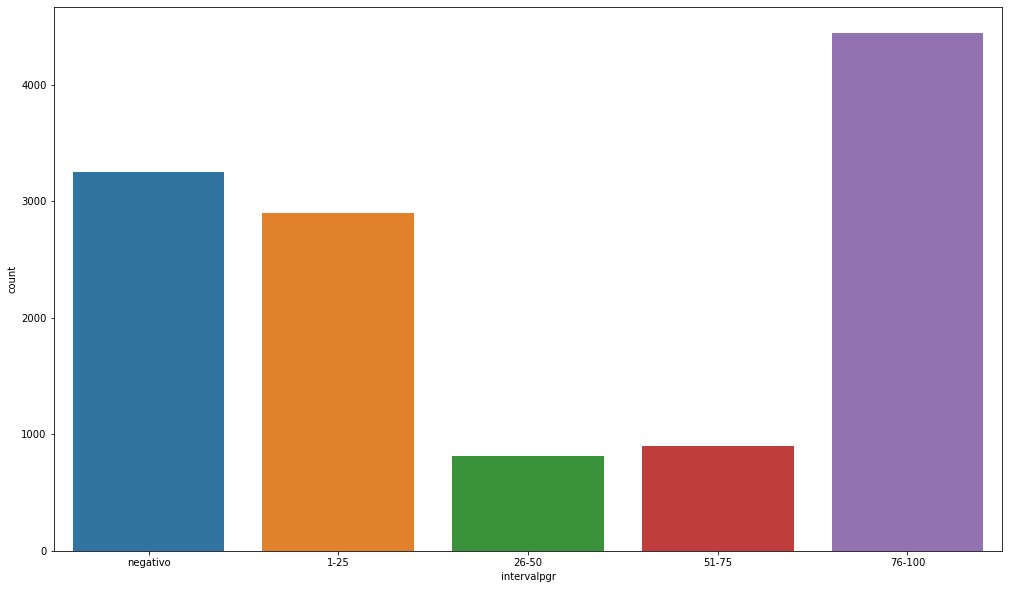

In [134]:
#pgr 0-10 5k - 91-100 - 66-100
plt.figure(figsize=(17, 10))
count = sns.countplot(df1['intervalpgr'],order=['negativo', '1-25', '26-50', '51-75' , '76-100'])
#['0-10','0-33', '11-20', '21-30', '31-40','33-66','41-50','51-60','61-70','66-100','71-80','81-90','91-100'])

In [135]:
df1.inter.value_counts()  #unbalanced

76-100      8339
0           3221
negativo    1905
1-25         889
51-75        286
26-50        166
Name: inter, dtype: int64

In [138]:
#create the final dataset
df1 = df1.iloc[:,[2,9,10,11]]
df1.head()

,text_final,inter,lab,intervalpgr
0,carcinom mammell duttal situ aspett tip apocri...,0,0,0
1,carcinom mammell duttal situ aspett tip apocri...,0,0,0
2,carcinom invas mammellasottotip duttal nasgrad...,0,0,0
3,carcinom invas mammellasottotip duttal nasgrad...,0,0,0
4,risult esam immunoistochim effettuatier propor...,negativo,1,1-25


## Modelling

### Multiclass classification

In [252]:
df2 = data.iloc[:,[12,20]]
df2= df2[df2['her2'] != "nan"]
df2= df2[df2['her2'] != "negativo"]
df2= df2[df2['her2'] != "positivo"]
#df2['lab'] = df2['her2'].factorize()[0]
df2

,her2,text_final
1,3+,carcinom mammell duttal situ aspett tip apocri...
11,3+,carcinom mammell duttal situ aspett tip apocri...
20,1+,carcinom invas mammellasottotip duttal nasgrad...
28,1+,carcinom invas mammellasottotip duttal nasgrad...
39,0,risult esam immunoistochim effettuatier propor...
...,...,...
74859,1+,assett recettorial immunoreattiv membran herne...
74861,1+,assett recettorial immunoreattiv membran herne...
74865,2+,assett recettorial immunoreattiv membran herne...
74866,3+,assett recettorial immunoreattiv membran herne...


In [253]:
her2_dict = {
    '0': 'negativo', 
    '1+': 'negativo', 
    '2+': 'borderline',
    '3+': 'positivo'
}

df2['classes'] = df2['her2'].map(her2_dict)

encoding_dict = { 'negativo': 1,
                 'borderline': 2,
                 'positivo':3
}

df2['lab'] = df2['classes'].map(encoding_dict)
df2

,her2,text_final,classes,lab
1,3+,carcinom mammell duttal situ aspett tip apocri...,positivo,3
11,3+,carcinom mammell duttal situ aspett tip apocri...,positivo,3
20,1+,carcinom invas mammellasottotip duttal nasgrad...,negativo,1
28,1+,carcinom invas mammellasottotip duttal nasgrad...,negativo,1
39,0,risult esam immunoistochim effettuatier propor...,negativo,1
...,...,...,...,...
74859,1+,assett recettorial immunoreattiv membran herne...,negativo,1
74861,1+,assett recettorial immunoreattiv membran herne...,negativo,1
74865,2+,assett recettorial immunoreattiv membran herne...,borderline,2
74866,3+,assett recettorial immunoreattiv membran herne...,positivo,3


In [254]:
from io import StringIO
category_id_df = df2[['classes', 'lab']].drop_duplicates().sort_values('lab')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['lab', 'classes']].values)


In [255]:
category_id_df

,classes,lab
20,negativo,1
45,borderline,2
1,positivo,3


In [256]:
id_to_category

{1: 'negativo', 2: 'borderline', 3: 'positivo'}

In [257]:


#non si può usare stop_words='italiano' solo inglese
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2))

features = tfidf.fit_transform(df2.text_final).toarray()
labels = df2.lab
features.shape

(14707, 10532)

In [260]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2

#for Product, category_id in sorted(category_to_id.items()):
for classes, lab in sorted(category_to_id.items()):
  features_chi2 = chi2(features,  np.array(df2.lab))
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  trigrams = [v for v in feature_names if len(v.split(' ')) == 3]
  print("# '{}':".format(classes))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))


C:\Users\Paola\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'borderline':
  . Most correlated unigrams:
. intens
. fortement
  . Most correlated bigrams:
. debol posit
. dak fortement


C:\Users\Paola\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 'negativo':
  . Most correlated unigrams:
. intens
. fortement
  . Most correlated bigrams:
. debol posit
. dak fortement
# 'positivo':
  . Most correlated unigrams:
. intens
. fortement
  . Most correlated bigrams:
. debol posit
. dak fortement


C:\Users\Paola\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [262]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df2['text_final'], df2['classes'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [ ]:
df1['text_cleaned'][25]

In [ ]:
print(clf.predict(count_vect.transform(["arcinoma invasivo mammellasottotipoduttalegrado istologico ntiinecrosi tumoraleassentecalcificazioniassentiinvasione vascolare peritumoralenon identificatainvasione perineuralenon identificatadimensioni neoplasia invasiva cmalterazioni morfologiche riferibili trattamento chemioterapico estese piano profondolibero neoplasiadue linfonodi sede metastasi quindici linfonodi esaminati popolazione neoplastica vitale inferiore metastasi esaminate risultano costiutite prevalentemente tessuto fibroso involuzione scleroticacarcinoma duttale situtipo istologico solido cribriformegrado nucleare iidimensioni focolaio pi grande carcinoma duttale situ mmassetto recettoriale immunoreattivita membrana herneu frazione proliferanteer proporzione cellule positive sezione esaminata pgr proporzione cellule positive sezione esaminata eimmunoreattivit membrana herneu anticorpo policlonale dako negativo frazione proliferante ki pari ghiandola mammaria linf ascellari snan"])))

In [ ]:
df1['int'][25]

In [274]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])


C:\Users\Paola\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Paola\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

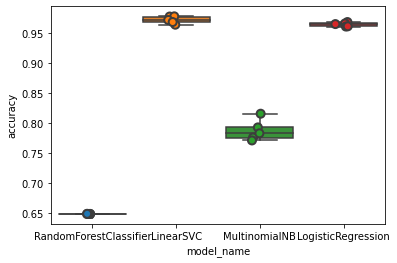

In [264]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [271]:
from sklearn.model_selection import train_test_split

model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df2.index, test_size=0.40, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

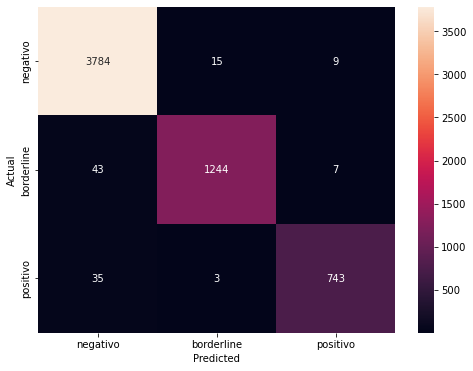

In [272]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.classes.values, yticklabels=category_id_df.classes.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

model = LogisticRegression(random_state=0)

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df1.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.int.values, yticklabels=category_id_df.int.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [275]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, 
                                    target_names=category_id_df.int.values))

AttributeError: 'DataFrame' object has no attribute 'int'

In [269]:
model.fit(features, labels)

LinearSVC()

In [270]:
from sklearn.feature_selection import chi2

N = 2
for int, lab in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[lab])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(classes))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'positivo':
  . Top unigrams:
       . fortement
       . intens
  . Top bigrams:
       . herneu posit
       . dak fortement
# 'positivo':
  . Top unigrams:
       . debol
       . complet
  . Top bigrams:
       . dak debol
       . debol posit


C:\Users\Paola\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


IndexError: index 3 is out of bounds for axis 0 with size 3

In [ ]:
--

In [139]:
X = df1['text_final']
df1['lab2'] = df1['intervalpgr'].factorize()[0]
 
y = df1[['lab2','lab']]

C:\Users\Paola\AppData\Local\Temp\ipykernel_29848\1494991769.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['lab2'] = df1['intervalpgr'].factorize()[0]


In [ ]:
y.shape

In [140]:
X

0        carcinom mammell duttal situ aspett tip apocri...
1        carcinom mammell duttal situ aspett tip apocri...
2        carcinom invas mammellasottotip duttal nasgrad...
3        carcinom invas mammellasottotip duttal nasgrad...
4        risult esam immunoistochim effettuatier propor...
                               ...                        
14823    assett recettorial immunoreattiv membran herne...
14824    assett recettorial immunoreattiv membran herne...
14825    assett recettorial immunoreattiv membran herne...
14826    assett recettorial immunoreattiv membran herne...
14827    assett recettorial immunoreattiv membran herne...
Name: text_final, Length: 14806, dtype: object

In [200]:
y

,lab2,lab
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
14823,2,2
14824,3,2
14825,1,2
14826,1,2


In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, random_state=42)

In [201]:
X_test

8072     carcinom invas mammellasottotipoduttalemicropa...
1034     carcinom invas mammellasottotipoduttaletip ist...
5559     carcinom mammell duttal situ focola microinvas...
6944     assett recettorial frazion prolifer posit dete...
4909     assett recettorial immunoreattiv membran herne...
                               ...                        
5674     assett recettorial immunoreattiv membran herne...
1887     carcinom invas mammell postchemioterapiasottot...
11482    carcinom invas mammellasottotip lobularetip is...
9767     carcinom invas mammellasottotipoduttaletip ist...
4330     carcinom invas mammellasottotipoduttaletip ist...
Name: text_final, Length: 4886, dtype: object

In [202]:
y_test

,lab2,lab
8072,5,2
1034,3,2
5559,2,1
6944,3,2
4909,0,0
...,...,...
5674,2,1
1887,0,0
11482,0,0
9767,3,2


### Multiclass-multioutput classification

In [143]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.multioutput import MultiOutputClassifier

pipeline_xgb =Pipeline([
                ('vect', CountVectorizer(tokenizer=word_tokenize)),
                ('tfidf', TfidfTransformer()),
                ('clf', MultiOutputClassifier(XGBClassifier())) ])

In [144]:
xgbparams = {
        'clf__estimator__learning_rate':[0.05, 0.10, 0.15, 0.20],
         'clf__estimator__max_depth' : [ 3, 4, 5, 6],
         "clf__estimator__min_child_weight" : [ 1, 3, 5, 7 ],
         "clf__estimator__gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4],
        "clf__estimator__colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7],
}

In [145]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(pipeline_xgb,param_distributions=xgbparams,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\Paola\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('vect',
                                              CountVectorizer(tokenizer=<function word_tokenize at 0x00000293D5E43430>)),
                                             ('tfidf', TfidfTransformer()),
                                             ('clf',
                                              MultiOutputClassifier(estimator=XGBClassifier(base_score=None,
                                                                                            booster=None,
                                                                                            callbacks=None,
                                                                                            colsample_bylevel=None,
                                                                                            colsample_bynode=None,
                                                                                            colsample_bytree=None,
                                                                                            early_stopping_rounds=None,...
                                                                                            num_parallel_tree=None,
                                                                                            predictor=None,
                                                                                            random_state=None, ...)))]),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'clf__estimator__colsample_bytree': [0.3,
                                                                             0.4,
                                                                             0.5,
                                                                             0.7],
                                        'clf__estimator__gamma': [0.0, 0.1, 0.2,
                                                                  0.3, 0.4],
                                        'clf__estimator__learning_rate': [0.05,
                                                                          0.1,
                                                                          0.15,
                                                                          0.2],
                                        'clf__estimator__max_depth': [3, 4, 5,
                                                                      6],
                                        'clf__estimator__min_child_weight': [1,
                                                                             3,
                                                                             5,
                                                                             7]},
                   scoring='roc_auc', verbose=3)

In [146]:
xgb = random_search.best_estimator_

In [147]:
xgb

Pipeline(steps=[('vect',
                 CountVectorizer(tokenizer=<function word_tokenize at 0x00000293D5E43430>)),
                ('tfidf', TfidfTransformer()),
                ('clf',
                 MultiOutputClassifier(estimator=XGBClassifier(base_score=None,
                                                               booster=None,
                                                               callbacks=None,
                                                               colsample_bylevel=None,
                                                               colsample_bynode=None,
                                                               colsample_bytree=0.4,
                                                               early_stopping_rounds=None,
                                                               enable_categorical=False,
                                                               eval_metri...
                                                               gpu_id=None,
                                                               grow_policy=None,
                                                               importance_type=None,
                                                               interaction_constraints=None,
                                                               learning_rate=0.1,
                                                               max_bin=None,
                                                               max_cat_threshold=None,
                                                               max_cat_to_onehot=None,
                                                               max_delta_step=None,
                                                               max_depth=3,
                                                               max_leaves=None,
                                                               min_child_weight=3,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               n_estimators=100,
                                                               n_jobs=None,
                                                               num_parallel_tree=None,
                                                               predictor=None,
                                                               random_state=None, ...)))])

In [148]:
pred_xgb = xgb.predict(X_test)

In [149]:
pred_xgb

array([[2, 2],
       [3, 2],
       [2, 1],
       ...,
       [0, 0],
       [3, 2],
       [3, 2]], dtype=int64)

In [150]:
def Extract(lst):
    l1 = []
    l1 = [item[0] for item in lst]
    return l1

def Extract2(lst):
    l1 = []
    l1 = [item[1] for item in lst]
    return l1

In [151]:
from sklearn.metrics import f1_score
e1 = Extract(pred_xgb)
e2 = y_test['lab2']
t1 = f1_score(e2, e1, average = 'weighted')

In [152]:
t1

0.6149881726590023

In [153]:
e3 = e1 = Extract2(pred_xgb)
e4 = y_test['lab']
t2 = f1_score(e4, e3, average = 'weighted')
t2

0.8343437268335706

In [154]:
xgb.fit(X_train,y_train)
xgb.score(X_test,y_test)

0.6015145313139583

In [ ]:
X = pd.DataFrame(X_test)
X
X = X.reset_index(drop=True)

In [ ]:
y = y_test.reset_index(drop=True)
y

In [ ]:
yhat = pd.DataFrame(pred_xgb)
yhat

In [ ]:
predict = pd.concat([X,y,yhat], axis=1)
predict


In [ ]:
print(random_search.fit(X_train, y_train).predict(["arcinoma invasivo mammellasottotipoduttalegrado istologico ntiinecrosi tumoraleassentecalcificazioniassentiinvasione vascolare peritumoralenon identificatainvasione perineuralenon identificatadimensioni neoplasia invasiva cmalterazioni morfologiche riferibili trattamento chemioterapico estese piano profondolibero neoplasiadue linfonodi sede metastasi quindici linfonodi esaminati popolazione neoplastica vitale inferiore metastasi esaminate risultano costiutite prevalentemente tessuto fibroso involuzione scleroticacarcinoma duttale situtipo istologico solido cribriformegrado nucleare iidimensioni focolaio pi grande carcinoma duttale situ mmassetto recettoriale immunoreattivita membrana herneu frazione proliferanteer proporzione cellule positive sezione esaminata pgr proporzione cellule positive sezione esaminata eimmunoreattivit membrana herneu anticorpo policlonale dako negativo frazione proliferante ki pari ghiandola mammaria linf ascellari snan"]))

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y, yhat)
accuracy

In [ ]:
--

In [155]:
# Load ML Pkgs
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

In [156]:

pipe_lr = Pipeline(steps=[('vect', CountVectorizer(tokenizer=word_tokenize)),
                          ('tfidf', TfidfTransformer()),
                          ('lr_multi',MultiOutputClassifier(LogisticRegression()))])

In [157]:
# Fit on Dataset
pipe_lr.fit(X_train,y_train)

C:\Users\Paola\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Paola\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Pipeline(steps=[('vect',
                 CountVectorizer(tokenizer=<function word_tokenize at 0x00000293D5E43430>)),
                ('tfidf', TfidfTransformer()),
                ('lr_multi',
                 MultiOutputClassifier(estimator=LogisticRegression()))])

In [158]:
# Accuracy Score
pipe_lr.score(X_test,y_test)

0.6232091690544412

In [ ]:
ex1 = X_test.iloc[15]
ex1

In [ ]:
# Prediction Prob
print(pipe_lr.classes_)
pipe_lr.predict_proba([ex1])

In [159]:

pipeline_knn =Pipeline([
                ('vect', CountVectorizer(tokenizer=word_tokenize)),
                ('tfidf', TfidfTransformer()),
                ('knn', MultiOutputClassifier(KNeighborsClassifier())) ])

In [213]:
knnparams = {
                'knn__estimator__n_neighbors' :[1,2,3,5,10],
                'knn__estimator__weights' : ['uniform','distance'],
                'knn__estimator__metric' : ['minkowski','euclidean','manhattan']
}

In [215]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(pipeline_knn,param_distributions=knnparams,n_iter=6,scoring='f1_micro',n_jobs=-1,cv=5,verbose=3)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\Paola\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('vect',
                                              CountVectorizer(tokenizer=<function word_tokenize at 0x00000293D5E43430>)),
                                             ('tfidf', TfidfTransformer()),
                                             ('knn',
                                              MultiOutputClassifier(estimator=KNeighborsClassifier()))]),
                   n_iter=6, n_jobs=-1,
                   param_distributions={'knn__estimator__metric': ['minkowski',
                                                                   'euclidean',
                                                                   'manhattan'],
                                        'knn__estimator__n_neighbors': [1, 2, 3,
                                                                        5, 10],
                                        'knn__estimator__weights': ['uniform',
                                                                    'distance']},
                   scoring='f1_micro', verbose=3)

In [216]:
knn = random_search.best_estimator_

NameError: name 'random_model_search' is not defined

In [217]:
knn

Pipeline(steps=[('vect',
                 CountVectorizer(tokenizer=<function word_tokenize at 0x00000293D5E43430>)),
                ('tfidf', TfidfTransformer()),
                ('knn',
                 MultiOutputClassifier(estimator=KNeighborsClassifier(metric='manhattan',
                                                                      n_neighbors=1,
                                                                      weights='distance')))])

In [208]:
knn.fit(X_train,y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(tokenizer=<function word_tokenize at 0x00000293D5E43430>)),
                ('tfidf', TfidfTransformer()),
                ('knn',
                 MultiOutputClassifier(estimator=KNeighborsClassifier(metric='euclidean',
                                                                      n_neighbors=15,
                                                                      weights='distance')))])

In [209]:
# Accuracy Score
knn.score(X_test,y_test)

0.7091690544412608

In [ ]:
pipeline_knn.predict([ex1])

In [ ]:
pipeline_knn.predict_proba([ex1])

,lab2,lab
8072,5,2
1034,3,2
5559,2,1
6944,3,2
4909,0,0
...,...,...
5674,2,1
1887,0,0
11482,0,0
9767,3,2


In [165]:
from sklearn.svm import LinearSVC
pipeline_svc =Pipeline([
                ('vect', CountVectorizer(tokenizer=word_tokenize)),
                ('tfidf', TfidfTransformer()),
                ('svc', MultiOutputClassifier(LinearSVC())) ])


In [166]:
pipeline_svc.fit(X_train,y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(tokenizer=<function word_tokenize at 0x00000293D5E43430>)),
                ('tfidf', TfidfTransformer()),
                ('svc', MultiOutputClassifier(estimator=LinearSVC()))])

In [167]:
pipeline_svc.score(X_test,y_test)

0.6954564060581253

In [ ]:
pipeline_svc.predict([ex1])

In [168]:
from sklearn.ensemble import RandomForestClassifier

In [169]:
pipeline_rf =Pipeline([
                ('vect', CountVectorizer(tokenizer=word_tokenize)),
                ('tfidf', TfidfTransformer()),
                ('randforest', MultiOutputClassifier(RandomForestClassifier(random_state=1))) ])

In [184]:
pipeline_rf.get_params()

{'memory': None,
 'steps': [('vect',
   CountVectorizer(tokenizer=<function word_tokenize at 0x00000293D5E43430>)),
  ('tfidf', TfidfTransformer()),
  ('randforest',
   MultiOutputClassifier(estimator=RandomForestClassifier(random_state=1)))],
 'verbose': False,
 'vect': CountVectorizer(tokenizer=<function word_tokenize at 0x00000293D5E43430>),
 'tfidf': TfidfTransformer(),
 'randforest': MultiOutputClassifier(estimator=RandomForestClassifier(random_state=1)),
 'vect__analyzer': 'word',
 'vect__binary': False,
 'vect__decode_error': 'strict',
 'vect__dtype': numpy.int64,
 'vect__encoding': 'utf-8',
 'vect__input': 'content',
 'vect__lowercase': True,
 'vect__max_df': 1.0,
 'vect__max_features': None,
 'vect__min_df': 1,
 'vect__ngram_range': (1, 1),
 'vect__preprocessor': None,
 'vect__stop_words': None,
 'vect__strip_accents': None,
 'vect__token_pattern': '(?u)\\b\\w\\w+\\b',
 'vect__tokenizer': <function nltk.tokenize.word_tokenize(text, language='english', preserve_line=False)>,
 '

In [185]:
rfparams = {'randforest__estimator__n_estimators': [10,50,100]
    
}

In [192]:
random_search = RandomizedSearchCV(pipeline_rf,param_distributions=rfparams,n_iter=6,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

random_search.fit(X_train, y_train)
rf = random_search.best_estimator_
rf.fit(X_train, y_train)

C:\Users\Paola\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 3 is smaller than n_iter=6. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 3 candidates, totalling 15 fits


C:\Users\Paola\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


Pipeline(steps=[('vect',
                 CountVectorizer(tokenizer=<function word_tokenize at 0x00000293D5E43430>)),
                ('tfidf', TfidfTransformer()),
                ('randforest',
                 MultiOutputClassifier(estimator=RandomForestClassifier(n_estimators=10,
                                                                        random_state=1)))])

In [193]:
rf.score(X_test,y_test)

0.7237003683995088

In [198]:
X_test

8072     carcinom invas mammellasottotipoduttalemicropa...
1034     carcinom invas mammellasottotipoduttaletip ist...
5559     carcinom mammell duttal situ focola microinvas...
6944     assett recettorial frazion prolifer posit dete...
4909     assett recettorial immunoreattiv membran herne...
                               ...                        
5674     assett recettorial immunoreattiv membran herne...
1887     carcinom invas mammell postchemioterapiasottot...
11482    carcinom invas mammellasottotip lobularetip is...
9767     carcinom invas mammellasottotipoduttaletip ist...
4330     carcinom invas mammellasottotipoduttaletip ist...
Name: text_final, Length: 4886, dtype: object

In [172]:
pipeline_NB =Pipeline([
                ('vect', CountVectorizer(tokenizer=word_tokenize)),
                ('tfidf', TfidfTransformer()),
                ('randforest', MultiOutputClassifier(MultinomialNB())) ])

In [173]:
pipeline_NB.fit(X_train, y_train)
pipeline_NB.score(X_test,y_test)

0.48260335652885794

In [ ]:
pipeline_rf.predict_proba([ex1])

In [ ]:

y_pred = pipeline_rf.predict(X_test)
y_pred

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix

conf_mat = multilabel_confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.int.values, yticklabels=category_id_df.int.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
y_true = np.array([[0,0,1], [1,1,0],[0,1,0]])
y_pred = np.array([[0,0,1], [1,0,1],[1,0,0]])

labels = ["A", "B", "C"]

conf_mat_dict={}

for label_col in range(len(labels)):
    y_true_label = y_true[:, label_col]
    y_pred_label = y_pred[:, label_col]
    conf_mat_dict[labels[label_col]] = confusion_matrix(y_pred=y_pred_label, y_true=y_true_label)


for label, matrix in conf_mat_dict.items():
    print("Confusion matrix for label {}:".format(label))
    print(matrix)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df1['text_cleaned'], df1['inter'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_counts = count_vect.fit_transform(X_test)
X_test_tfidf = tfidf_transformer.fit_transform(X_test_counts)

clf = LazyClassifier()
models,predictions = clf.fit(X_train_tfidf,X_test_tfidf , y_train, y_test)

print(models)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from nltk.tokenize.treebank import TreebankWordDetokenizer

In [ ]:
# detokenize
#df['final_text'] 
tri = dati_model.text_stemming.apply(TreebankWordDetokenizer().detokenize)
tri

In [ ]:
#Train-Test split
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df['final_text'],
                                                                    df['int'],test_size=0.3,
                                                                    random_state = 42)

In [ ]:
#Train-Validation split
Train_X, Val_X, Train_Y, Val_Y = model_selection.train_test_split(Train_X,
                                                                    Train_Y,test_size=0.1,
                                                                    random_state = 42)

In [ ]:
Train_Y,Test_Y

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

le.fit(["0-10", "11-20", "21-30", "31-40","41-50","51-60","61-70","71-80","81-90","91-100","33-66","66-100"])
le.classes_
le.transform(["0-10", "11-20", "21-30", "31-40","41-50","51-60","61-70","71-80","81-90","91-100","33-66","66-100"])

In [ ]:
Encoder = LabelEncoder()
Encoder.fit_transform(Train_Y),Train_Y

In [ ]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)
Val_Y = Encoder.fit_transform(Val_Y)
Train_Y.shape

In [ ]:
#vectorize the text with TF-IDF framework
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(df['final_text'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X) 
Test_X_Tfidf = Tfidf_vect.transform(Test_X)
Val_X_Tfidf = Tfidf_vect.transform(Val_X)

sezione prova logistic regression

In [ ]:
#vectorize the text with TF-IDF framework
Tfidf_vect = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2))
Tfidf_vect.fit(df['final_text'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X).toarray()   #aggiunto solo to array
Test_X_Tfidf = Tfidf_vect.transform(Test_X).toarray()
Val_X_Tfidf = Tfidf_vect.transform(Val_X)
Train_X_Tfidf.shape
(4569,12633)
#Now, each of 4569 consumer complaint narratives is represented by 12633 features,
#representing the tf-idf score for different unigrams and bigrams.
category_id_df = df[['int', 'lab']].drop_duplicates().sort_values('lab')

category_to_id = dict(category_id_df.values)

In [ ]:
category_to_id

In [ ]:
type(Train_X_Tfidf)

In [ ]:
x = np.array(df.lab)
x = x[:9051]
x.shape






In [ ]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2

#for Product, category_id in sorted(category_to_id.items()):
for int, l in sorted(category_to_id.items()):
  features_chi2 = chi2(Train_X_Tfidf, x)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(Tfidf_vect.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  trigrams = [v for v in feature_names if len(v.split(' ')) == 3]
  print("# '{}':".format(int))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))
  print("  . Most correlated trigrams:\n. {}".format('\n. '.join(trigrams[-N:])))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['final_text'], df['int'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [ ]:
df['final_text'][0]

In [ ]:
df['int'][0]

In [ ]:
print(clf.predict(count_vect.transform(["carcinom mammell duttal situ aspett tip apocrinograd nucl iiigrad istolog epwgii cancerizz lobularenecr tumoralepresentecalcificazionipresentidistribu carcinom situmultifocaledimension neoplas situ foc multifocal maggior cm focal immagin permeazion neoplast vascol attribu trasport manovr biopticheassett recettorial immunoreattiv membran herneu frazion proliferanteer proporzion cellul posit sezion esamin pgr proporzion cellul posit sezion esamin immunoreattivit membran herneu anticorp policlonal dak fortement positivoquadr sup mammell dxnpl mammell dx"])))

In [ ]:
df['final_text'][24]

In [ ]:
df['int'][24]

In [ ]:
print(clf.predict(count_vect.transform(["risult esam immunoistochim effettuatier proporzion cellul posit sezion esamin controll intern costitu struttur ghiandolar mammar benign residu positivopgr proporzion cellul posit sezion esamin controll intern costitu struttur ghiandolar mammar benign residu positivopher neu negativomib nannan"])))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, Train_X_Tfidf, x, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [ ]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [ ]:
cv_df.groupby('model_name').accuracy.mean()

In [ ]:
from sklearn.model_selection import train_test_split

model = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=0)

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(Train_X_Tfidf, x, df.index[:9051], test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.int.values, yticklabels=category_id_df.int.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
y_pred

In [ ]:
##> K-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
## prediction score
from sklearn.metrics import accuracy_score

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
accuracy_knn = []
for nNB in range(1, 20, 2):
    model_kNN = KNeighborsClassifier(n_neighbors=nNB).fit(Train_X_Tfidf, Train_Y)
    y_pred = model_kNN.predict(Val_X_Tfidf)
    print(str(nNB), "Accuracy:", accuracy_score(Val_Y, y_pred))
    accuracy_knn.append(accuracy_score(Val_Y, y_pred))

In [ ]:
neighbors = list(range(1, 20, 2))
knn = pd.DataFrame({"neighbors": neighbors, "accuracy": accuracy_knn})

sns.barplot(x = 'neighbors',
            y = 'accuracy',
            data = knn)
 
# Show the plot
plt.show()

In [ ]:
##> Support Vector Machines
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

In [ ]:
accuracy_svm = []
for c_param in np.arange(1.0, 201.0, 100.0):
    model_lSVC = LinearSVC(C=c_param, max_iter=10000).fit(Train_X_Tfidf, Train_Y)
    y_pred= model_lSVC.predict(Val_X_Tfidf)
    print(str(c_param), "Accuracy:", accuracy_score(Val_Y, y_pred))
    accuracy_svm.append(accuracy_score(Val_Y, y_pred))

In [ ]:

##> Decision Tree
from sklearn.tree import DecisionTreeClassifier
##> Random Forest
from sklearn.ensemble import RandomForestClassifier
##> Bagging
from sklearn.ensemble import BaggingClassifier
##> AdaBoost
from sklearn.ensemble import AdaBoostClassifier
## prediction score
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_tree = []
for max_d in [3, 5, 10, 20, 50, 80, 100, 150,200]:
    model_DT = DecisionTreeClassifier(max_depth=max_d).fit(Train_X_Tfidf, Train_Y)
    y_pred = model_DT.predict(Val_X_Tfidf)
    print(str(max_d), "Accuracy:", accuracy_score(Val_Y, y_pred))
    accuracy_tree.append(accuracy_score(Val_Y, y_pred))

In [ ]:
#I choose max depth = None because it was the splitting that performs better in the tree above
model_RF = RandomForestClassifier(criterion='entropy', max_depth=200).fit(Train_X_Tfidf, Train_Y)
y_pred = model_RF.predict(Val_X_Tfidf)
print("Accuracy:", accuracy_score(Val_Y, y_pred))

In [ ]:
accuracies = []

#1-NN
model_kNN = KNeighborsClassifier(n_neighbors=1).fit(Train_X_Tfidf, Train_Y)
y_pred = model_kNN.predict(Test_X_Tfidf)
accuracies.append(accuracy_score(Test_Y, y_pred))

#decision tree
model_DT = DecisionTreeClassifier(max_depth=None).fit(Train_X_Tfidf, Train_Y)
y_pred = model_DT.predict(Test_X_Tfidf)
accuracies.append(accuracy_score(Test_Y, y_pred))

#Naive Bayes 
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)
predictions_NB = Naive.predict(Test_X_Tfidf)
accuracies.append(accuracy_score(predictions_NB, Test_Y))

#Random Forest 
model_RF = RandomForestClassifier(criterion='entropy', max_depth=None).fit(Train_X_Tfidf, Train_Y)
y_pred = model_RF.predict(Test_X_Tfidf)
accuracies.append(accuracy_score(Test_Y, y_pred))

In [ ]:
accuracies

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(Test_Y, y_pred)
sns.heatmap(cf_matrix, annot=True,cmap='Blues')
sns.set(rc={'figure.figsize':(15,10)})

In [ ]:
from sklearn.metrics import classification_report
target_names = ['0-10', '11-20', '21-30', '31-40','33-66','41-50','51-60','61-70','66-100','71-80','81-90','91-100']
print(classification_report(Test_Y, y_pred, target_names=target_names))

Logistic Regression

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


UNSUPERVIDED LEARNING

k-Means Clustering is an unsupervised learning algorithm that is used for clustering whereas KNN is a supervised learning algorithm used for classification.

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
km = df.iloc[:,[3,4]]
km

In [ ]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(km).score(km) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
model = KMeans(n_clusters = 4)
model.fit(km)
model.labels_
colormap = np.array(['Red', 'Blue', 'Green', 'Yellow'])
z = plt.scatter(km.limits_0, km.limits_1,c = colormap[model.labels_])

approfonsci KNN

-- prova Hierarchical Clustering Algorithms?

correlation between er and pgr

In [ ]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(df['final_text'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)
Val_X_Tfidf = Tfidf_vect.transform(Val_X)

In [ ]:
Train_X_Tfidf

In [ ]:

tfidf_train_sparse = Tfidf_vect.fit_transform(Train_X)
tfidf_train_df = pd.DataFrame(tfidf_train_sparse.toarray(), 
                        columns=Tfidf_vect.get_feature_names())
tfidf_train_df.head(1)

In [ ]:
from sklearn.decomposition import TruncatedSVD
lsa_obj = TruncatedSVD(n_components=20, n_iter=100, random_state=42)
tfidf_lsa_data = lsa_obj.fit_transform(Train_X_Tfidf)
Sigma = lsa_obj.singular_values_
V_T = lsa_obj.components_.T

In [ ]:
sns.barplot(x=list(range(len(Sigma))), y = Sigma)

In [ ]:
term_topic_matrix = pd.DataFrame(data=tfidf_lsa_data, 
                                 index = eda_train.columns, 
                                 columns = [f'Latent_concept_{r}' for r in range(0,V_T.shape[1])])